In [146]:
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Dataset visualization
## BoW

In [50]:
from gensim.matutils import corpus2csc, unitvec
import numpy as np
import scipy.sparse
from sklearn.decomposition import TruncatedSVD
import sklearn.preprocessing as preprocessing

from common import common_dictionary, common_embedding_matrices

train, *_ = load_amazon()
X = train.corpus
y = np.array(train.target, dtype=int)

2019-02-14 15:32:30,837 : INFO : Loading dataset from file corpora/amazon_train.pkl.xz.
2019-02-14 15:32:32,978 : INFO : Loading dataset from file corpora/amazon_validation.pkl.xz.
2019-02-14 15:32:33,731 : INFO : Loading dataset from file corpora/amazon_test.pkl.xz.


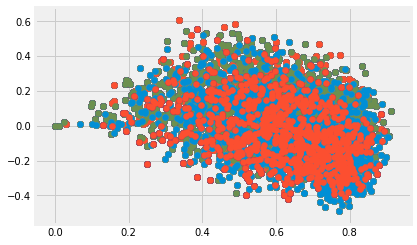

In [51]:
X_bow = map(common_dictionary.doc2bow, X)
X_bow = map(unitvec, X_bow)
X_bow = TruncatedSVD().fit_transform(corpus2csc(X_bow, len(common_dictionary)).T)
for target_class in y:
    target_indices = y == target_class
    plt.scatter(X_bow[target_indices, 0], X_bow[target_indices, 1])

## Dense Soft VSM (32b)

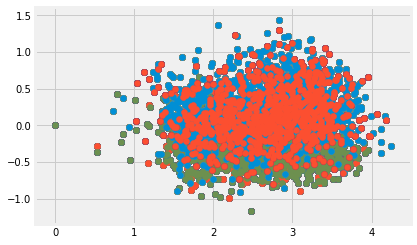

In [52]:
embedding_matrix = common_embedding_matrices[32]
embedding_matrix = preprocessing.normalize(embedding_matrix, norm='l2')

X_dense_soft_vsm = map(common_dictionary.doc2bow, X)
X_dense_soft_vsm = map(unitvec, X_dense_soft_vsm)
X_dense_soft_vsm = scipy.sparse.csc_matrix.dot(
    embedding_matrix.T,
    corpus2csc(X_dense_soft_vsm, len(common_dictionary)),
).T
X_dense_soft_vsm = TruncatedSVD().fit_transform(X_dense_soft_vsm)
for target_class in y:
    target_indices = y == target_class
    plt.scatter(X_dense_soft_vsm[target_indices, 0], X_dense_soft_vsm[target_indices, 1])

## Dense Soft VSM (1b)

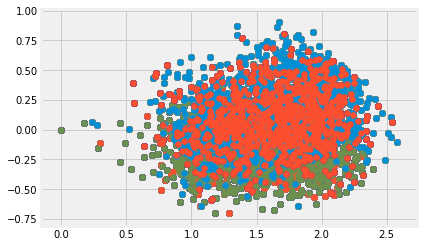

In [53]:
embedding_matrix = common_embedding_matrices[1]
embedding_matrix = preprocessing.normalize(embedding_matrix, norm='l2')

X_dense_soft_vsm = map(common_dictionary.doc2bow, X)
X_dense_soft_vsm = map(unitvec, X_dense_soft_vsm)
X_dense_soft_vsm = scipy.sparse.csc_matrix.dot(
    embedding_matrix.T,
    corpus2csc(X_dense_soft_vsm, len(common_dictionary)),
).T
X_dense_soft_vsm = TruncatedSVD().fit_transform(X_dense_soft_vsm)
for target_class in y:
    target_indices = y == target_class
    plt.scatter(X_dense_soft_vsm[target_indices, 0], X_dense_soft_vsm[target_indices, 1])

## Sparse Soft VSM (32b)

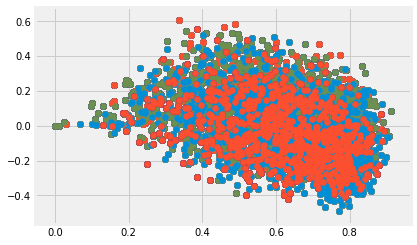

In [58]:
from scikits.sparse.cholmod import cholesky

from common import cached_sparse_term_similarity_matrix

embedding_matrix = cached_sparse_term_similarity_matrix('32-True-True-True-600')
embedding_matrix = cholesky(embedding_matrix).L()

X_dense_soft_vsm = map(common_dictionary.doc2bow, X)
X_dense_soft_vsm = map(unitvec, X_dense_soft_vsm)
X_dense_soft_vsm = scipy.sparse.csc_matrix.dot(
    embedding_matrix.T,
    corpus2csc(X_dense_soft_vsm, len(common_dictionary)),
).T
X_dense_soft_vsm = TruncatedSVD().fit_transform(X_dense_soft_vsm)
for target_class in y:
    target_indices = y == target_class
    plt.scatter(X_dense_soft_vsm[target_indices, 0], X_dense_soft_vsm[target_indices, 1])

## Sparse Soft VSM (1b)

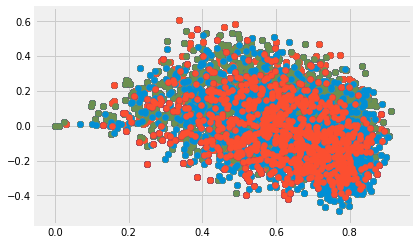

In [60]:
from scikits.sparse.cholmod import cholesky

from common import cached_sparse_term_similarity_matrix

embedding_matrix = cached_sparse_term_similarity_matrix('1-True-True-True-600')
embedding_matrix = cholesky(embedding_matrix).L()

X_dense_soft_vsm = map(common_dictionary.doc2bow, X)
X_dense_soft_vsm = map(unitvec, X_dense_soft_vsm)
X_dense_soft_vsm = scipy.sparse.csc_matrix.dot(
    embedding_matrix.T,
    corpus2csc(X_dense_soft_vsm, len(common_dictionary)),
).T
X_dense_soft_vsm = TruncatedSVD().fit_transform(X_dense_soft_vsm)
for target_class in y:
    target_indices = y == target_class
    plt.scatter(X_dense_soft_vsm[target_indices, 0], X_dense_soft_vsm[target_indices, 1])

# Sparse Term Similarity Matrices

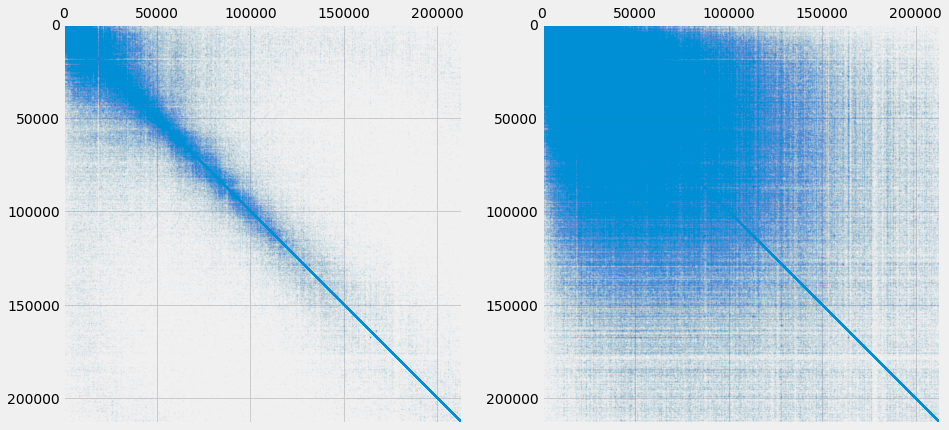

In [159]:
%matplotlib inline
from common import cached_sparse_term_similarity_matrix
from scipy.sparse import coo_matrix
    
fig = plt.figure(figsize=(14, 14))

ax = fig.add_subplot(121)
embedding_matrix = cached_sparse_term_similarity_matrix('32-True-True-True-600')
ax.spy(embedding_matrix, markersize=0.005)

ax = fig.add_subplot(122)
embedding_matrix = cached_sparse_term_similarity_matrix('1-True-True-True-600')
ax.spy(embedding_matrix, markersize=0.005)

plt.show()

# Confusion Matrices

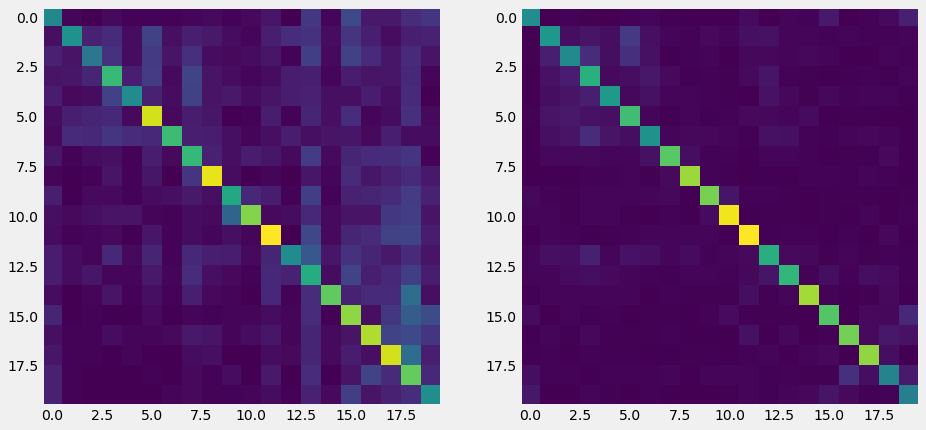

In [160]:
fig = plt.figure(figsize=(14, 14))

ax = fig.add_subplot(121)
result = results['20news'][('vsm', 'bow', 'inner_product', 32)]
ax.imshow(result.confusion_matrix, interpolation='nearest')
ax.grid(None)

ax = fig.add_subplot(122)
result = results['20news'][('sparse_soft_vsm', 'tfidf', 'inner_product', 1)]
ax.imshow(result.confusion_matrix, interpolation='nearest')
ax.grid(None)

plt.show()